# 2. Modelos de distribución multivariados

<p align="right">
Autor: Emmanuel Alcalá
<br>
<a href="https://scholar.google.com.mx/citations?hl=en&user=3URusCgAAAAJ&view_op=list_works&sortby=pubdate">Google Scholar</a>
</p>

<p align="left">
<br>
<a href="https://jealcalat.github.io/Analisis_multivariado/">Regresar a la página del curso</a>
</p>

---


## 2.2. Distribución multinormal

Ya vimos que para la distribución normal univariada, la función de densidad está dada por

$$
  p(x) = \frac{1}{\sigma \sqrt{2\pi}} e\left\{\frac{-(x-\mu)^2}{2\sigma^2}\right\}  \tag{8}
$$

Cuando $\mu = 0, \sigma = 1$, la ecuación (8) es una distribución especial llamada _distribución normal estándar_. La distribución normal estándar $\mathcal{N}(0, 1)$ tiene ciertas propiedades interesantes:

1. En el intervalo $\left[\mu - \sigma, \mu + \sigma \right]$ se cubre el 0.683 del área total, es decir, $p(\mu - \sigma \leq X \leq \mu + \sigma) \approx 0.68$.
2. En el intervalo $\left[\mu - 2\sigma, \mu + 2\sigma \right]$ se cubre el .954 del área total.
3. El área en $X \leq \mu - \sigma$ es $1 - p(X > \mu - \sigma)$


In [6]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Given that the distribution is symmetric, p(mu - sigma <= X <= mu + sigma)
# The region mu-sigma is the same as mu+sigma, therefore, it's sufficient
# to subtract from 1 the probability p(mu-sigma <= X) * 2
print(np.round(1 - (norm.cdf(-1, loc=0, scale=1) * 2), 3))
print(np.round(1 - (norm.cdf(-2, loc=0, scale=1) * 2), 3))

# With 3 sigma it covers 99% of the space
print(np.round(1 - (norm.cdf(-3, loc=0, scale=1) * 2), 3))

# The probability of x <= mu-sigma is
print(np.round(1 - norm.cdf(1, loc=0, scale=1), 3))

# Or equivalently
print(np.round(norm.cdf(-1, loc=0, scale=1), 3))


0.683
0.954
0.997
0.159
0.159


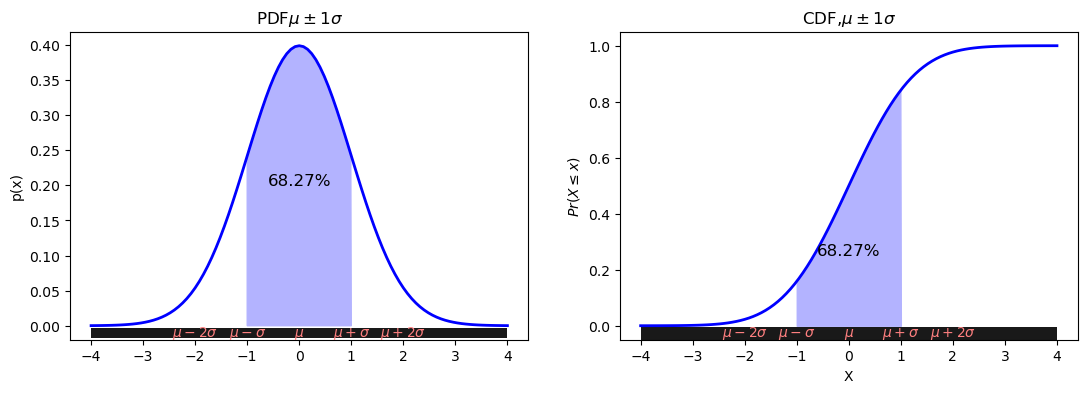

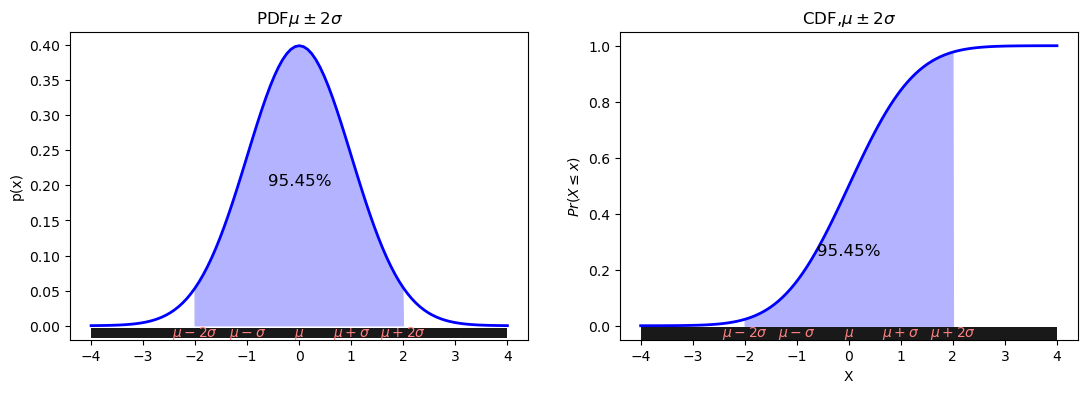

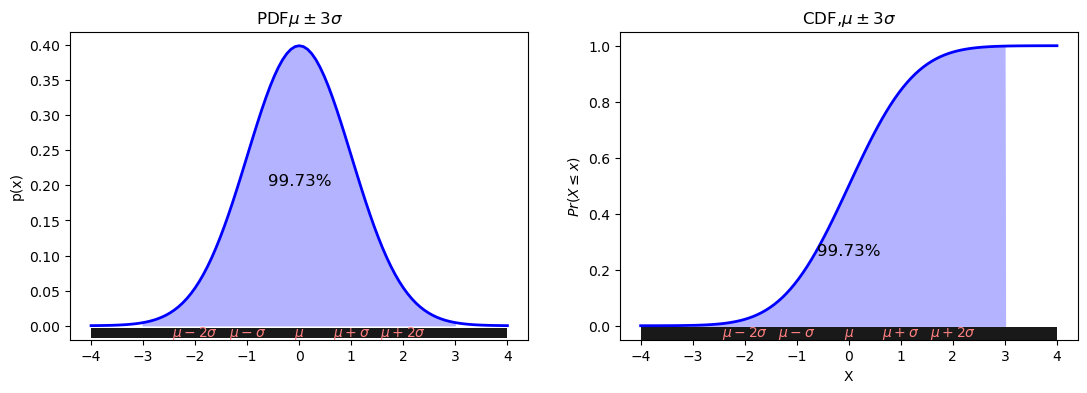

In [9]:
# Here is a function that plots the PDF and CDF of a normal distribution for 
# a given mean and standard deviation. It also plots the area under the curve

def plot_normal_distribution(mean=0, std_dev=1, lower_limit=-1, upper_limit=1, c=1):
    # Setting up plot dimensions
    fig, axes = plt.subplots(1, 2, figsize=(13, 4))

    # PDF of Gaussian (Normal)
    x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 101)
    y = norm.pdf(x, mean, std_dev)

    axes[0].plot(x, y, color='blue', linewidth=2)
    axes[0].set_title('PDF' + f'$ \mu \pm {c}\sigma $')
    axes[0].set_ylabel('p(x)')

    sx = np.concatenate([[lower_limit], np.arange(lower_limit, upper_limit, 0.01), [upper_limit]])
    sy = np.concatenate([[0], norm.pdf(np.arange(lower_limit, upper_limit, 0.01), mean, std_dev), [0]])

    axes[0].fill(sx, sy, color='#B3B3FF')
    percentage = (norm.cdf(upper_limit, mean, std_dev) - norm.cdf(lower_limit, mean, std_dev)) * 100
    axes[0].text((lower_limit + upper_limit) / 2, norm.pdf(mean, mean, std_dev) / 2, f"{percentage:.2f}%", fontsize=12, ha='center')
    annotation_points = [mean, mean-std_dev, mean-2*std_dev, mean+std_dev, mean+2*std_dev]
    annotation_labels = [r'$\mu$', r'$\mu-\sigma$', r'$\mu-2\sigma$', r'$\mu+\sigma$', r'$\mu+2\sigma$']

    annotation_y_offset_points = -7  # The y-offset for the annotation in points
    annotation_y_offset_data_coords = annotation_y_offset_points / axes[0].figure.bbox.height * (axes[0].get_ylim()[1] - axes[0].get_ylim()[0])
    annotation_y_data_coords = y.min() + annotation_y_offset_data_coords

    # Create a single gray rectangle at the y-coordinate of the annotation
    rect_height = 0.013  # Height of the rectangle

    rect = Rectangle((x.min(), annotation_y_data_coords - rect_height / 1.4), 
                    x.max() - x.min(), rect_height, 
                    linewidth=1, edgecolor='none',
                    facecolor='black', alpha=0.9)
    axes[0].add_patch(rect)

    # Annotate points on top of the gray rectangle
    for point, label in zip(annotation_points, annotation_labels):
        axes[0].annotate(label, xy=(point, annotation_y_data_coords), 
                        xycoords='data', 
                        color='#FF8080',
                        textcoords='offset points', 
                        xytext=(0, annotation_y_offset_points+3), ha='center')

    # CDF of Gaussian
    y_cdf = norm.cdf(x, mean, std_dev)
    axes[1].plot(x, y_cdf, color='blue', linewidth=2)
    axes[1].set_title('CDF,' + f'$ \mu \pm {c}\sigma $')
    axes[1].set_xlabel('X')
    axes[1].set_ylabel(r"$Pr(X \leq x)$")

    sy_cdf = np.concatenate([[0], norm.cdf(np.arange(lower_limit, upper_limit, 0.01), mean, std_dev), [0]])
    axes[1].fill_between(sx, sy_cdf, color='#B3B3FF')
    axes[1].text((lower_limit + upper_limit) / 2, 
                 (norm.cdf(lower_limit, mean, std_dev) + norm.cdf(upper_limit, mean, std_dev)) / 4, 
                 f"{percentage:.2f}%", fontsize=12, ha='center')
    annotation_y_offset_data_coords = annotation_y_offset_points / axes[1].figure.bbox.height * (axes[1].get_ylim()[1] - axes[1].get_ylim()[0])
    annotation_y_data_coords = y_cdf.min() + annotation_y_offset_data_coords

    # Create a single gray rectangle at the y-coordinate of the annotation
    rect_height = 0.05  # Height of the rectangle

    rect = Rectangle((x.min(), annotation_y_data_coords - rect_height / 1.4), 
                    x.max() - x.min(), rect_height, 
                    linewidth=1, edgecolor='none',
                    facecolor='black', alpha=0.9)
    axes[1].add_patch(rect)

    # Annotate points on top of the gray rectangle
    for point, label in zip(annotation_points, annotation_labels):
        axes[1].annotate(label, xy=(point, annotation_y_data_coords), 
                        xycoords='data', 
                        color='#FF8080',
                        textcoords='offset points', 
                        xytext=(0, annotation_y_offset_points+3), ha='center')
    plt.show()

# Example usage
mu = 0
sigma = 1
const = [1, 2, 3]

for c in const:
    plot_normal_distribution(mean=mu, std_dev=sigma, lower_limit=mu-c*sigma, upper_limit=mu+c*sigma, c=c)


El término en el exponente en la ecuación (8)

$$
  \frac{(x-\mu)^2}{2\sigma^2}
$$

Puede ser convenientemente reescrito como

$$
  \frac{(x-\mu)^2}{2\sigma^2} = (x - \mu)(\sigma^2)^{-1}(x-\mu)
$$

Para mostrar que este término mide el cuadrado de la distancia entre $x$ y $\mu$ en unidades de desviación estándar. Esta distancia ser generalizada para un vector $\mathbf{x} \in \mathbb{R}^D$ de $D$ variables como

$$
  (\mathbf{x}-\boldsymbol{\mu})^\top \boldsymbol{\Sigma}^{-1}(\mathbf{x}-\boldsymbol{\mu}) \tag{9}
$$

A la ecuación (9) se le conoce como distancia de Mahalanobis (en realidad, el cuadrado de la distancia de Mahalanobis), que es la distancia entre un punto y su distribución (univariada o multivariada). 

La distancia de Mahalanobis es una generalización de la distancia entre un punto en una distribución y su media. La simple medición de la distancia euclidiana entre puntos en un espacio multivariado puede resultar engañosa cuando las variables están correlacionadas. La distancia de Mahalanobis explica esta correlación utilizando la inversa de la matriz de covarianza. Esto garantiza que la medida de distancia no se vea indebidamente influenciada por variables altamente correlacionadas.


### Sobre las distancias

En matemáticas y ciencia de datos, el concepto de "distancia" sirve como una forma de cuantificar qué tan separados están dos puntos en un espacio dado. Las distancias son fundamentales para diversas aplicaciones, desde agrupación y clasificación hasta optimización y detección de anomalías. La distancia euclideana:

$$
  d(\mathbf{x}, \mathbf{y}) = \sqrt{\sum_{i=1}^D (x_i - y_i)^2} \tag{10}
$$

asume que el "espacio dado" es isotrópico, lo que significa que es el mismo en todas las direcciones. La distancia se calcula como si te movieras en línea recta de un punto a otro, sin considerar ninguna posible correlación entre las variables ni sus diferentes escalas. Básicamente, todas las dimensiones se consideran ortogonales (no correlacionadas) y la escala se considera uniforme en todas las dimensiones. La distancia euclideana seguiría siendo válida si la variable estuviera distribuida en una esfera, pero no si estuviera distribuida en un elipsoide, como es el caso cuando las variables están correlacionadas.

### 2.2.1. Distribución bivariada

La distribución normal multivariada (MVN) se caracteriza completamente por el vector de medias $\boldsymbol{\mu}$ y la matriz de covarianzas $\boldsymbol{\Sigma}$

$$
  p(\mathbf{x} \mid \boldsymbol{\mu},\boldsymbol{\Sigma}) = \frac{1}{(2\pi)^{D/2}|\boldsymbol{\Sigma}|^{1/2}}e\left\{ -\frac{1}{2}(\boldsymbol{y}-\boldsymbol{\mu})^\top \boldsymbol{\Sigma}^{-1}(\boldsymbol{y}-\boldsymbol{\mu}) \right\} \tag{10}
$$

En donde $\boldsymbol{\mu}=\mathbb{E}[y]$ y $D=\text{dim}(\boldsymbol{y})$ (la dimensión de $\boldsymbol{y}$; en el caso de una normal bivariada $D=2$). $\boldsymbol{\Sigma}$ es la matriz simétrica $D\times D$ de covarianza. En $D=2$ (bivariada), $\boldsymbol{\Sigma}$ es

$$
  \boldsymbol{\Sigma} = \begin{bmatrix}
  \sigma_1^2 & \sigma_{12}^2\\
  \sigma_{21}^2 & \sigma_{2}^2
  \end{bmatrix}
$$

Como se vio en la lección 1, el coeficiente de correlación $\rho$ es igual a la covarianza $\sigma_{12}^2$ dividida por el producto de las desviaciones estándar $\sigma_1\sigma_2$

$$
  \rho_{X_1,X_2} = \frac{\sigma_{12}^2}{\sigma_1\sigma_2}
$$

Por lo que, despejando, tenemos $\sigma_{12}^2 = \rho\sigma_1\sigma_2$. La matriz de covarianzas puede ser reescrita como

$$
  \boldsymbol{\Sigma} = \begin{bmatrix}
  \sigma_1^2 & \rho\sigma_1\sigma_2\\
  \rho\sigma_1\sigma_2 & \sigma_{2}^2
  \end{bmatrix} \tag{11}
$$

El determinante $|\Sigma|$ para la bivariada es, de acuerdo con la ecuación (2)

$$
\begin{align*}
  \text{det}(\Sigma) &= \sigma_1^2\sigma_2^2 - (\rho\sigma_1\sigma_2)^2\\
                     &= \sigma_1^2\sigma_2^2 - \rho^2\sigma_1^2\sigma_2^2\\
                     &= \sigma_1^2\sigma_2^2(1-\rho^2) \tag{12}
\end{align*}
$$

Esta forma de representar la distribución bivariada (aplica también para al MVN) enfatiza la influencia de la correlación en la pdf conjunta. En la siguiente sección simulamos dicha influencia.


#### Distribución normal bivariada: una breve descripción

La distribución normal bivariada es un tipo de distribución multivariada. Describe el comportamiento de dos variables y captura la relación lineal entre ellas. La distribución está definida por:

1. Medias de las dos variables: $ \mu_1 $ y $ \mu_2 $
2. Varianzas de las dos variables: $ \sigma_1^2 $ y $ \sigma_2^2 $
3. El coeficiente de correlación $ \rho $ entre las dos variables.

La función de densidad de probabilidad conjunta (pdf) de la distribución normal bivariada es:

$$
f(x_1, x_2) = \frac{1}{2\pi\sigma_1\sigma_2\sqrt{1-\rho^2}} \exp\left(-\frac{1}{2(1-\rho^2)}\left[\frac{(x_1-\mu_1)^2}{\sigma_1^2} - 2\rho\frac{(x_1-\mu_1)(x_2-\mu_2)}{\sigma_1\sigma_2} + \frac{(x_2-\mu_2)^2}{\sigma_2^2}\right]\right)
$$

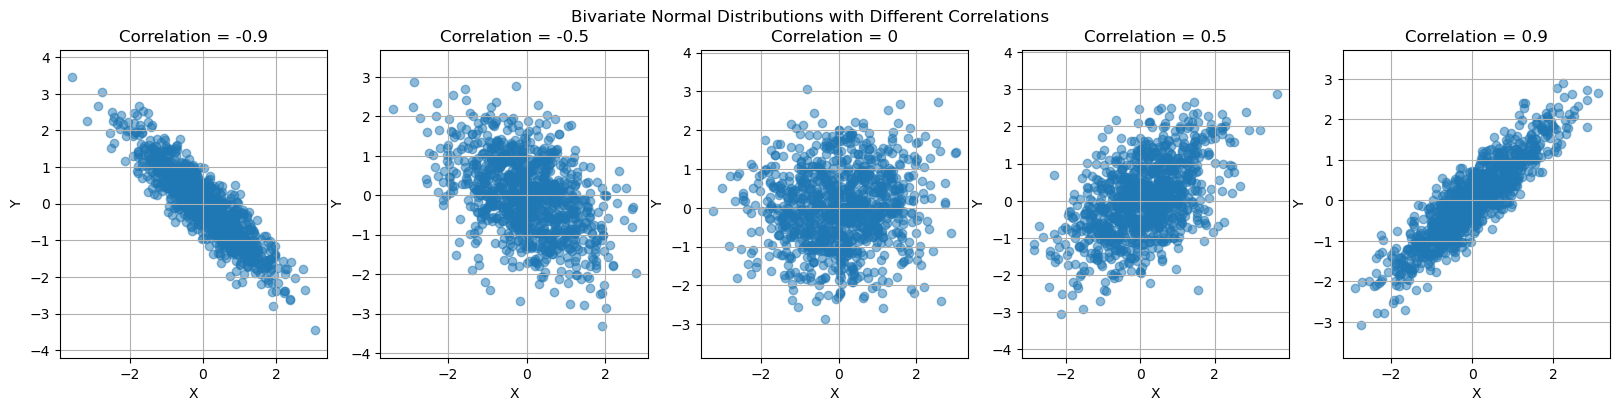

In [11]:
# Function to simulate and plot bivariate normal distribution on a given axis
def simulate_and_plot_bivariate_normal(ax, correlation):
    mean = [0, 0]  # Mean vector
    covariance_matrix = [[1, correlation], [correlation, 1]]  # Covariance matrix
    
    # Generate samples
    samples = np.random.multivariate_normal(mean, covariance_matrix, 1000)
    
    # Extract X and Y variables
    x, y = samples[:, 0], samples[:, 1]
    
    # Create scatter plot on the given axis
    ax.scatter(x, y, alpha=0.5)
    ax.set_title(f'Correlation = {correlation}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.axis('equal')
    ax.grid(True)

# Create subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

# Simulate and plot for different correlation values
correlations = [-0.9, -0.5, 0, 0.5, 0.9]
for ax, corr in zip(axes, correlations):
    simulate_and_plot_bivariate_normal(ax, corr)

# Add a super title for the entire figure
plt.suptitle('Bivariate Normal Distributions with Different Correlations')
plt.show()


Ahora vamos a evaluar el efecto de $\rho$ sobre la distribución bivariada. Primero, recordar de la ecuación (9) 

$$
  d_M^2 = (\mathbf{x}-\boldsymbol{\mu})^\top \boldsymbol{\Sigma}^{-1}(\mathbf{x}-\boldsymbol{\mu}) \tag{9}
$$

Es la distancia cuadrada de Mahalanobis, que mide la distancia de un punto $p=(x_1, x_2)$ al centroide $\boldsymbol{\mu} = \left[\mu_1, \mu_2 \right] $, considerando la correlación, a diferencia de la distancia euclideana. Notar que, dado que depende de $\boldsymbol{\Sigma}$, está influenciada por la correlación.

Vamos a notar algunas cosas sobre $d_M^2$:

1. Todos los valores de $\mathbf{x}$ cuyo valor de $d_M^2$ son iguales tienen la misma densidad $f(\mathbf{x})$.
2. A medida que $d_M^2$ incrementa, $f(\mathbf{x})$ *decrece*.
3. A medida que $d_M^2$ incrementa la distancia entre $\mathbf{x}$ y $\boldsymbol{\mu}$ incrementa, esto equivale a que un valor se mueva hacia las colas de una distribución.
4. La variable $d_M^2$ tiene una distribución $\chi^2$ con $p$ grados de libertad, en donde $p$ es la dimensión de $\mathbf{x}$. Se pueden obtener valores de $d_M$ obteniendo el valor en $x$ de la distribución acumulada de $\chi^2$ que corresponde a un cuantil (una proporción del área bajo la curva). Abajo se ilustra la forma de una distribución de $\chi^2$ con 3 grados de libertad.
5. El cuantil en $\chi^2(1-\alpha,df=p)$ corresponde al cuadrado del radio de un (hiper)-elipse, en donde $1-\alpha$ es un nivel de significancia (una densidad de probabilidad).

Los puntos 2 y 3 permiten obtener una aplicación interesante: dado que los puntos se alejan del centro de la distribución, un punto que tenga una distancia de Mahalanobis probablemente no pertenece a la distribución, es decir es un outlier.

Los puntos 4 y 5 permite construir elipses de confianza (análogos a los intervalos de confianza para 2D), lo que facilita la visualización.

La distribución de Chi-cuadrada es una distribución de probabilidad continua con un parámetro de forma $k$ que especifica el número de grados de libertad (el número de variables aleatorias independientes que se suman), es la distribución de suma de cuadrados de $k$ variables aleatorias estándar normales independientes, es una distribución asimétrica, con un sesgo positivo. Se define como:

$$
f(x) = \frac{1}{2^{k/2}\Gamma(k/2)}x^{k/2-1}e^{-x/2}
$$


Suponer una distribución bivariada normal $X\sim \mathcal{N}(\bm\mu, \Sigma)$ con centroide

$$
  \boldsymbol{\mu} = \begin{bmatrix}
  3.1 \\ 3.0
  \end{bmatrix}
$$

Y matriz de covarianzas

$$
  \Sigma = \begin{bmatrix}
    0.7163324 & 0.6876791\\
    0.6876791 & 1.0601719
  \end{bmatrix}
$$

Cuya inversa $\Sigma^{-1}$ (ver los Preliminares de esta Notebook)

$$
  \Sigma^{-1}=\begin{bmatrix}
    3.7 & -2.4\\
   -2.4 & 2.5
  \end{bmatrix}
$$

1. Encontrar la distancia euclideana de los puntos $p_1 = (5, 5), p_2 = (5, 2)$ con respecto a $\bm\mu$.
2. Encontrar $d_M$, la distancia cuadrática de Malahanobis.
3. Verificar si $p_1, p_2$ son outliers de acuerdo a $d_M$ y su distribución, al $\alpha = 0.05$ de confianza.

Supongamos que estamos analizando el desempeño de una cartera de acciones. Las dos variables en la distribución normal bivariada $X$ podrían representar:

- La primera variable $X_1$ podría representar los rendimientos mensuales de la Acción A.
- La segunda variable $X_2$ podría representar los rendimientos mensuales de la Acción B.

El centroide $\boldsymbol{\mu}$ representa los rendimientos mensuales promedio de la Acción A ($\mu_1 = 3.1\%$) y la Acción B ($\mu_2 = 3.0\%$).

La matriz de covarianza $\Sigma$ proporciona información sobre las variaciones (volatilidad) de estos rendimientos para cada acción y también cómo se correlacionan. Una covarianza positiva sugiere que cuando la acción A tiene un buen desempeño, la acción B también tiende a tener un buen desempeño y viceversa.

### Interpretación de los puntos $p_1$ y $p_2$

- **Punto $p_1 = (5, 5)$**: Esto representa un mes en el que tanto la Acción A como la Acción B dieron un rendimiento del 5%, que está por encima del rendimiento promedio de ambas acciones.
  
- **Punto $p_2 = (5, 2)$**: Esto representa un mes en el que la Acción A dio un rendimiento del 5%, pero la Acción B solo dio un rendimiento del 2%. La acción A tuvo un desempeño superior al promedio, pero la acción B no.



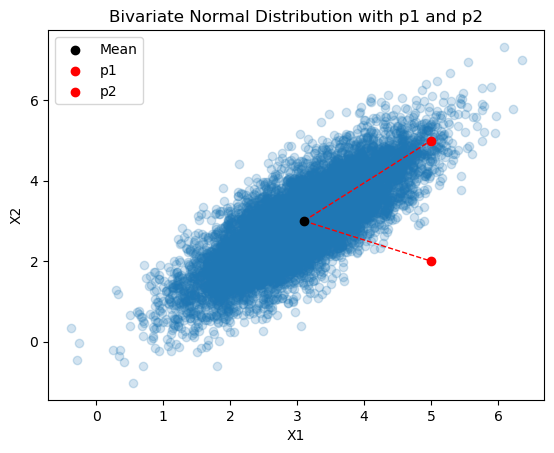

In [29]:
from scipy.stats import multivariate_normal

# Define the parameters
mu = np.array([3.1, 3.0])
Sigma = np.array([[0.7163324, 0.6876791],
                  [0.6876791, 1.0601719]])

# Simulate 10,000 samples from the bivariate normal distribution
# Note: You can replace this array with the one obtained from Wolfram if you prefer
samples = np.random.multivariate_normal(mu, Sigma, 10000)

# Define the points p1 and p2
p1 = np.array([5, 5])
p2 = np.array([5, 2])

# Create the scatter plot
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.2)
plt.scatter(mu[0], mu[1], color='black', label='Mean', zorder=5)
plt.scatter(p1[0], p1[1], color='red', label='p1', zorder=5)
plt.scatter(p2[0], p2[1], color='red', label='p2', zorder=5)
# add two lines from p1 and p2 to the mean
plt.plot([mu[0], p1[0]], [mu[1], p1[1]], color='red', linestyle='--', linewidth=1)
plt.plot([mu[0], p2[0]], [mu[1], p2[1]], color='red', linestyle='--', linewidth=1)
# Add labels and title
plt.title('Bivariate Normal Distribution with p1 and p2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()

# Show the plot
plt.show()


In [15]:
import numpy as np
from scipy.spatial import distance
from numpy.linalg import inv

# Define the centroid (mu)
mu = np.array([3.1, 3.0])

# Define the covariance matrix (Sigma) and its inverse
Sigma = np.array([[0.7163324, 0.6876791],
                  [0.6876791, 1.0601719]])
Sigma_inv = inv(Sigma)
Sigma_inv

array([[ 3.70000012, -2.40000018],
       [-2.40000018,  2.5000002 ]])

In [17]:
# Calculate Mahalanobis distance for p1 and p2
def mahalanobis(x, mu, Sigma_inv):
    delta = x - mu # Difference between the point and the mean
    return np.sqrt(np.dot(np.dot(delta, Sigma_inv), delta.T))

dM_p1 = mahalanobis(p1, mu, Sigma_inv)
dM_p2 = mahalanobis(p2, mu, Sigma_inv)

print(f"Mahalanobis distance for p1: {dM_p1:.4f}")
print(f"Mahalanobis distance for p2: {dM_p2:.4f}")


Mahalanobis distance for p1: 2.2621
Mahalanobis distance for p2: 4.9977


In [18]:
# Calculate Mahalanobis distance for p1 and p2 using scipy.spatial
dM_p1_scipy = distance.mahalanobis(p1, mu, Sigma_inv)
dM_p2_scipy = distance.mahalanobis(p2, mu, Sigma_inv)

print(f"Mahalanobis distance for p1 using scipy: {dM_p1_scipy:.4f}")
print(f"Mahalanobis distance for p2 using scipy: {dM_p2_scipy:.4f}")

Mahalanobis distance for p1 using scipy: 2.2621
Mahalanobis distance for p2 using scipy: 4.9977


In [16]:
# Define the points p1 and p2
p1 = np.array([5, 5])
p2 = np.array([5, 2])
# Calculate Euclidean distance for p1 and p2
dE_p1 = distance.euclidean(mu, p1)
dE_p2 = distance.euclidean(mu, p2)

print(f"Euclidean distance for p1: {dE_p1:.4f}")
print(f"Euclidean distance for p2: {dE_p2:.4f}")


Euclidean distance for p1: 2.7586
Euclidean distance for p2: 2.1471


### Lo que nos dicen las distancias

1. **Distancia euclidiana**: Tanto $p_1$ como $p_2$ están relativamente cerca de los rendimientos promedio, lo que sugiere que no son valores atípicos basados únicamente en la distancia euclidiana.

2. **Distancia de Mahalanobis**:
     - Para $p_1$, la distancia de Mahalanobis es $2.26$, lo que sugiere que este punto no está muy alejado de la tendencia general de la cartera.
     - Para $p_2$, la distancia de Mahalanobis es $4.9976$, que es significativamente mayor. Esto sugiere que los rendimientos de este mes en particular son inusuales en comparación con la tendencia general.

### Detección de valores atípicos

Usando una prueba de chi-cuadrado para la detección de valores atípicos en $\alpha = 0.05$, encontraríamos que es más probable que $p_2$ sea considerado un valor atípico según su distancia de Mahalanobis. Esto podría ser un indicio de un evento que afectó significativamente a la Acción B pero no a la Acción A, lo que justifica una mayor investigación.

El nivel de significancia, a menudo indicado por $ \alpha $, es la probabilidad de rechazar la hipótesis nula cuando en realidad es cierta. En términos más simples, es la probabilidad de cometer un "error de tipo I" o identificar falsamente un efecto o diferencia que en realidad no existe. Los niveles de significancia comúnmente utilizados incluyen 0,05, 0,01 y 0,10, que corresponden a probabilidades del 5%, 1% y 10% de cometer un error de tipo I, respectivamente.

En el contexto de la detección de valores atípicos, un nivel de significancia de $ \alpha = 0.05 $ significa que hay un 5 % de posibilidades de clasificar incorrectamente un punto como un valor atípico cuando no lo es.

In [19]:
from scipy.stats import chi2

# Calculate the Mahalanobis distance squared for p1 and p2
dM_p1_squared = dM_p1 ** 2
dM_p2_squared = dM_p2 ** 2

# Find the critical value for alpha = 0.05 and k = 2
alpha = 0.05
k = 2
critical_value = chi2.ppf(1 - alpha, k)

# Determine if p1 and p2 are outliers
is_outlier_p1 = dM_p1_squared > critical_value
is_outlier_p2 = dM_p2_squared > critical_value

print(f"Critical value for chi-squared distribution: {critical_value:.4f}")
print(f"Mahalanobis distance squared for p1: {dM_p1_squared:.4f}")
print(f"Mahalanobis distance squared for p2: {dM_p2_squared:.4f}")
print(f"Is p1 an outlier? {is_outlier_p1}")
print(f"Is p2 an outlier? {is_outlier_p2}")


Critical value for chi-squared distribution: 5.9915
Mahalanobis distance squared for p1: 5.1170
Mahalanobis distance squared for p2: 24.9770
Is p1 an outlier? False
Is p2 an outlier? True


Vemos que $d_M$ de $p_1$ es menor a este valor, pero $d_M$ de $p_2$ (4.99) no lo es. Por lo tanto, al $1-\alpha$ de confianza, concluimos que $p_2$ es un outlier.

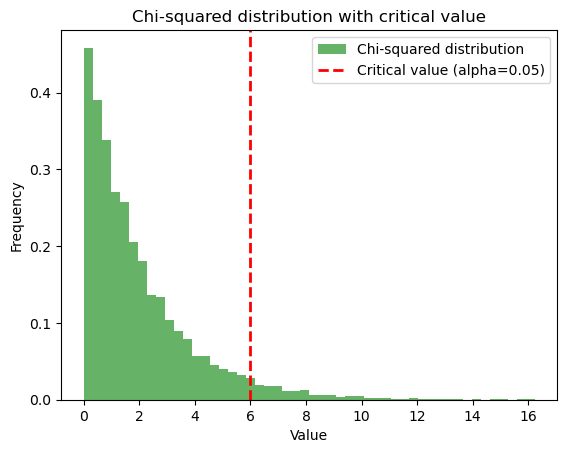

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2

# Simulate 10,000 samples from a chi-squared distribution with 2 degrees of freedom
# Note: You can replace this array with the one obtained from Wolfram if you prefer
samples = np.random.chisquare(2, 10000)

# Calculate the critical value for alpha = 0.05 and k = 2
alpha = 0.05
k = 2
critical_value = chi2.ppf(1 - alpha, k)

# Create the histogram
plt.hist(samples, bins=50, density=True, alpha=0.6, color='g', label='Chi-squared distribution')

# Plot the critical value
plt.axvline(critical_value, color='r', linestyle='dashed', linewidth=2, label=f'Critical value (alpha={alpha})')

# Add labels and title
plt.title('Chi-squared distribution with critical value')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()


Ejemplo:
Supongamos que tenemos un conjunto de datos de alturas y pesos de personas. Podemos modelar estas dos variables como una distribución multinormal, con una media de 170 cm y 70 kg, y una desviación estándar de 10 cm y 15 kg, respectivamente.

Una vez que tenemos un modelo para las alturas y pesos, podemos usar Python para calcular la probabilidad de que una persona aleatoria tenga una altura entre 160 y 180 cm y un peso entre 60 y 80 kg. Para hacer esto, podemos usar la función `numpy.random.multivariate_normal()` para generar un número aleatorio de puntos a partir de la distribución multinormal. Luego, podemos usar la función numpy.where() para identificar los puntos que se encuentran dentro del rango deseado de alturas y pesos. Finalmente, podemos usar la función numpy.count_nonzero() para contar el número de puntos que se encuentran dentro del rango deseado.

El siguiente código muestra cómo implementar este algoritmo en Python:



In [30]:
import numpy as np

# Define the mean and standard deviation of the multivariate normal distribution
mean = (170, 70)
std = (10, 15)

# Generate a random sample from the multivariate normal distribution
samples = np.random.multivariate_normal(mean, std, 10000)

# Find the points that are within the desired range of heights and weights
in_range = np.where((samples[:, 0] > 160) & (samples[:, 0] < 180) & (samples[:, 1] > 60) & (samples[:, 1] < 80))

# Count the number of points that are within the range
count = np.count_nonzero(in_range)

# Print the probability of a person having a height between 160 and 180 cm and a weight between 60 and 80 kg
probability = count / len(samples)

print(probability)

ValueError: cov must be 2 dimensional and square